# Importing Libraries

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Reading CSV File

In [ ]:
# reading the file
df = pd.read_csv('/content/fraud_oracle.csv')

In [ ]:
pd.set_option('display.max_columns', None)

### Dataset feature description
* **Month:** Month of accident
* **WeekofMonth:** Week of accident
* **DayofWeek:** Day of accident
* **Make:** Manufacture company of car
* **AccidentArea:** Area where accident took place (Rural or Urban)
* **DayofWeekClaimed:** Day of filing Insurance claim
* **MonthClaimed:** Month of filing Insurance claim
* **WeekofMonthClaimed:** Week of filing Insurance claim
* **Sex:** Gender of Insurance claimant (Male or Female)
* **MaritalStatus:** **Single, married, widow, and divorced
* **Age:** Age of Insurance policy holder
* **Fault:** Policy holder or third party
* **PolicyType:** Type of policies issued
* **VehicleCategory:** Sedan, sport, or utility
* **VehiclePrice:** Price of vehicle
* **PolicyNumber:** Policy number issued to customer
* **RepNumber:** ID of the person who handles the claim
* **Deductible:** Amount to be deducted before claim disbursement
* **DriverRating:** Experience of the driver
* **DaysPolicyAccident:** Days left in policy since accident
* **DaysPolicyClaim:** Days left in policy since filing of a claim
* **PastNumberofClaims:** Past number of claims filed by customer
* **AgeofVehicle:** Age of the vehicle (8 categories)
* **AgeofPolicyHolder:** Policy holder’s age (9 categories)
* **PoliceReportFiled:** Police report filed after accident (Yes or No)
* **WitnessPresented:** Witness present during accident (Yes or No)
* **AgentType:** Type of insurance agent (Internal or External)
* **NumberofSupplements:** Number of supplements
* **AddressChangeClaim:** Number of times change of address requested by insurance claimant
* **NumberofCars:** Number of cars owned by the claimant
* **Year:** Year – 1994, 1995, and 1996
* **BasePolicy:** Base policy of the insurance (3 categories)
* **FraudFound_P:** Binary Class (Yes or No)

In [ ]:
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
# we can clearly see that there are not any null values in the datset

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Errors in data
# min age of policy holder is zero in some row
# make to be renamed to Manufacture_company
# there are two columns one is age and other one is Ageofpolicyholder. these both tells the same information.we have to see if have to keep both or not

# rest all things looks fine .We will look for more errors during the process of EDA (Exploratory Data Analysis)

In [ ]:
df.Age.value_counts()

Age
30    596
33    574
34    573
35    569
28    560
     ... 
20     28
70     27
79     20
16      9
17      6
Name: count, Length: 66, dtype: int64

In [ ]:
df[df.Age == 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,more than 69000,0,8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,more than 69000,0,14,12,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,1,29,9,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,more than 69000,0,32,6,400,1,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,59,15,400,4,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,15244,7,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,15263,5,400,3,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,more than 69000,0,15275,1,400,2,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,0,Policy Holder,Utility - All Perils,Utility,more than 69000,0,15380,1,400,3,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


In [ ]:
df[df.Age == 0].AgeOfPolicyHolder.value_counts()

AgeOfPolicyHolder
16 to 17    320
Name: count, dtype: int64

In [ ]:
# Age column is zero but in ageofpolicyholder column has '16 to 17' value
# we have two choices either to fill the values of age column with 16 or 17 randomly
# or instead of using the age column we will use Age of policyholder column as it is much better explanation of data
# clearly there is anamoly in age column
# we can drop these values as 320 is very less in comparison to 15420

In [ ]:
df = df[df.Age != 0]

In [ ]:
df.rename(columns = {'Make':'Manufacture_company'}, inplace = True)

In [ ]:
for column in df.columns:
  if df[column].dtype == 'object':
    print(f'Unique values in {column} are:')
    print(df[column].value_counts())
    print()

Unique values in Month are:
Month
Jan    1352
May    1336
Mar    1313
Oct    1301
Jun    1297
Dec    1259
Jul    1241
Apr    1235
Sep    1235
Feb    1219
Nov    1190
Aug    1122
Name: count, dtype: int64

Unique values in DayOfWeek are:
DayOfWeek
Monday       2547
Friday       2392
Tuesday      2262
Thursday     2136
Wednesday    2108
Saturday     1945
Sunday       1710
Name: count, dtype: int64

Unique values in Manufacture_company are:
Manufacture_company
Pontiac      3837
Toyota       3121
Honda        2482
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         108
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64

Unique values in AccidentArea are:
AccidentArea
Urban    13554
Rural     1546
Name: count, dtype: int64

Unique values in DayOfWeekClaimed are:
DayOfWeekClaimed
Monday  

In [ ]:
# Errors
# 0 value in 'DayOfWeekClaimed' column
# 0 value in 'MonthClaimed' column
# none value in 'Days_Policy_Claim' column

In [ ]:
df[df['DayOfWeekClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Manufacture_company,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [ ]:
# We can drop this column as this is not useful for our analysis as there is anamoly in DayofWeekClaimed,MonthClaimed,Days_Policy_Claim column

In [ ]:
df = df[df['DayOfWeekClaimed']!='0']

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.shape

(15100, 34)

In [ ]:
df

,index,Month,WeekOfMonth,DayOfWeek,Manufacture_company,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15096,15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15097,15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15098,15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
df.columns

Index(['index', 'Month', 'WeekOfMonth', 'DayOfWeek', 'Manufacture_company',
       'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [ ]:
df

,index,Month,WeekOfMonth,DayOfWeek,Manufacture_company,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15096,15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15097,15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15098,15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


## Univariate Analysis

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
df['FraudFound_P'].value_counts()

FraudFound_P
0    14208
1      892
Name: count, dtype: int64

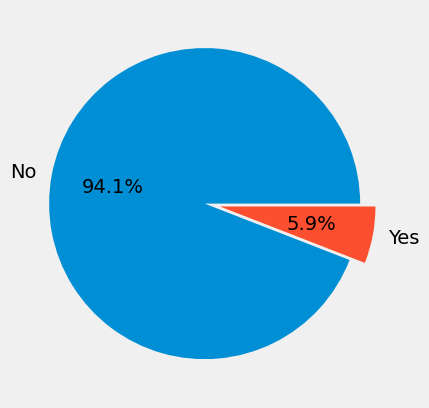

In [ ]:
plt.pie(df['FraudFound_P'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',explode=[0,0.1])
plt.show()

In [ ]:
# There is clearly a case of class imbalance hence we have to tackle this situation

In [ ]:
df.drop(columns=['index'],inplace=True)

In [ ]:
df

,Month,WeekOfMonth,DayOfWeek,Manufacture_company,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15096,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15097,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15098,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
df.drop(columns=['PolicyNumber'],inplace=True)

In [ ]:
df

,Month,WeekOfMonth,DayOfWeek,Manufacture_company,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15096,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15097,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15098,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
# Month column univariate analysis -> Categorical feature
df['Month'].value_counts()

Month
Jan    1352
May    1336
Mar    1313
Oct    1301
Jun    1297
Dec    1259
Jul    1241
Apr    1235
Sep    1235
Feb    1219
Nov    1190
Aug    1122
Name: count, dtype: int64

<Axes: xlabel='Month'>

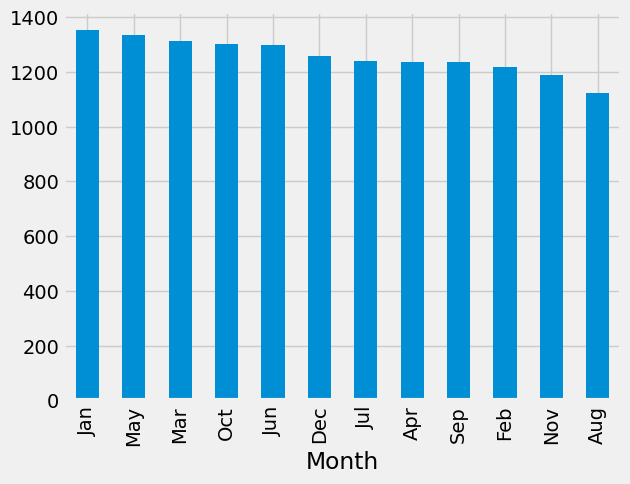

In [ ]:
df['Month'].value_counts().plot(kind='bar')

In [ ]:
# Analysis Results - Most Number of Accidents occured in month of January and minimum number of accidents occured in August

<Axes: xlabel='WeekOfMonth'>

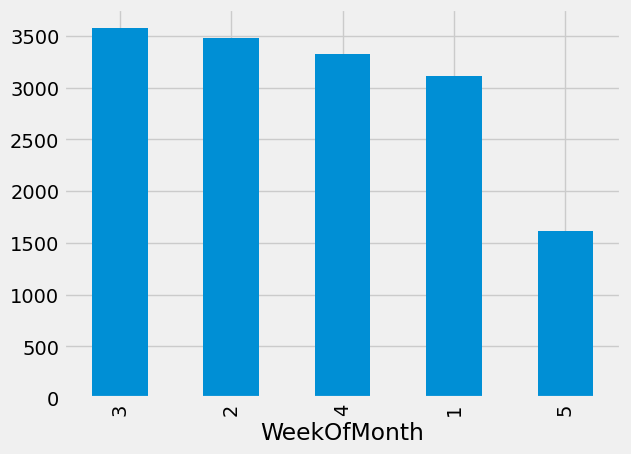

In [ ]:
# WeekOfMonth -> Categorical
df['WeekOfMonth'].value_counts().plot(kind='bar')

In [ ]:
# Analysis Results -> Genrally very less number of accidents occured during 5th week of month

<Axes: xlabel='DayOfWeek'>

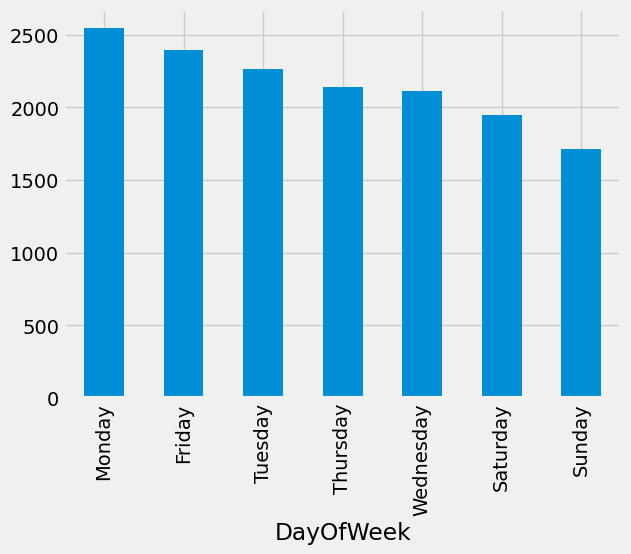

In [ ]:
df['DayOfWeek'].value_counts().plot(kind='bar')

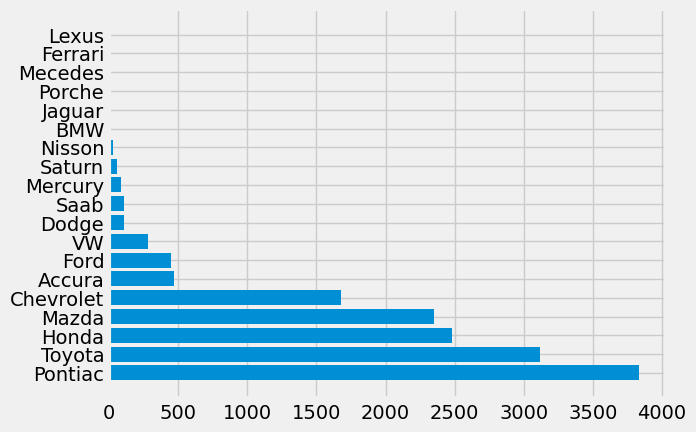

In [ ]:
# Manufacture Company
plt.barh(df['Manufacture_company'].value_counts().index,df['Manufacture_company'].value_counts())
plt.show()

In [ ]:
# Analysis Result -> The top 5 manufacture companies whose vehicles are involved in accident are :
# Pontiac, Toyota, Honda, Mazda, Chevorlet

In [ ]:
# Accident area
df['AccidentArea'].value_counts()

AccidentArea
Urban    13554
Rural     1546
Name: count, dtype: int64

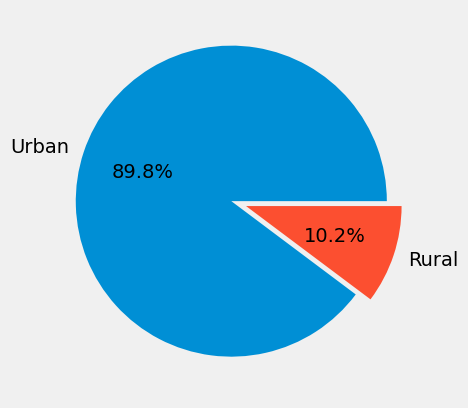

In [ ]:
plt.pie(df['AccidentArea'].value_counts(),labels=['Urban', 'Rural'],autopct='%1.1f%%',explode = [0.05,0.05])
plt.show()

In [ ]:
# Clearly most number of accident reports are from urban areas which is easily justified thinking about the current world scenario

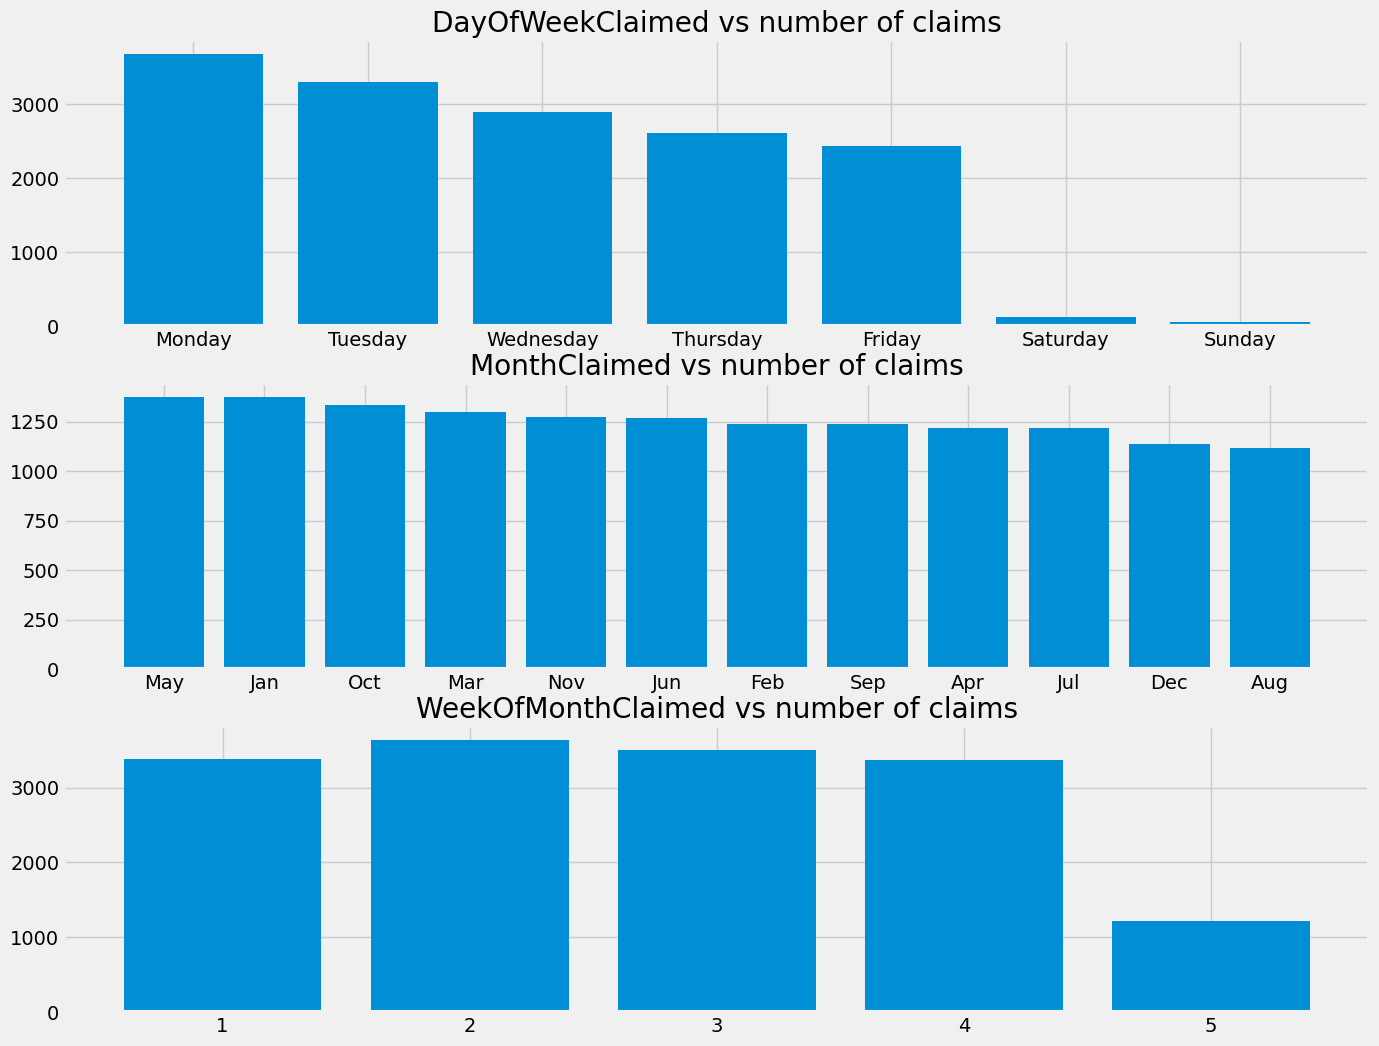

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(15,12))
claim_time_period = ['DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed']
counter = 0;
for i in claim_time_period:
  ax[counter].bar(df[i].value_counts().index,df[i].value_counts())
  counter+=1
ax[0].set_title('DayOfWeekClaimed vs number of claims')
ax[1].set_title('MonthClaimed vs number of claims')
ax[2].set_title('WeekOfMonthClaimed vs number of claims')
plt.show()

In [ ]:
# Analysis result -> this bar chart shows the time period when maximum and minimum number of claims are filed

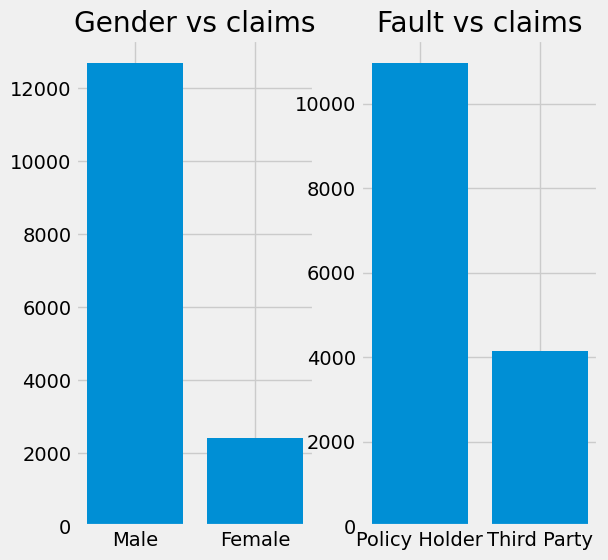

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
var = ['Sex','Fault']
counter = 0;
for i in var:
  ax[counter].bar(df[i].value_counts().index,df[i].value_counts())
  counter+=1
ax[0].set_title('Gender vs claims')
ax[1].set_title('Fault vs claims')
plt.show()

In [ ]:
# in most of the claims the person at fault of accident is Policy Holder itself and most of the policy holders are male

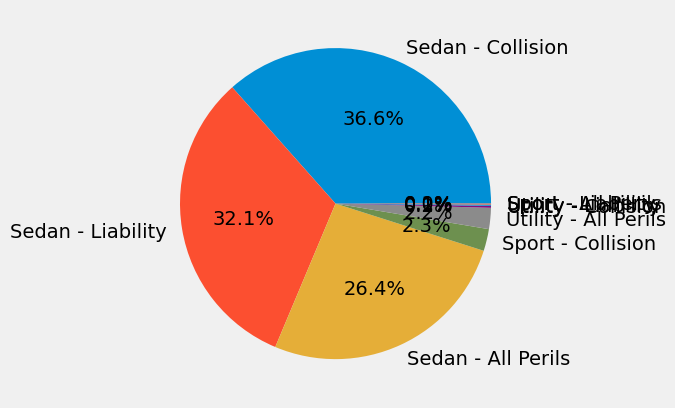

In [ ]:
plt.pie(df['PolicyType'].value_counts(),labels=df['PolicyType'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
# The three most popular policy type among policy holders are 'Sedan-Collision','Sedan-Liability','Sedan-All Perils'
# These three policies almost make 95% of data

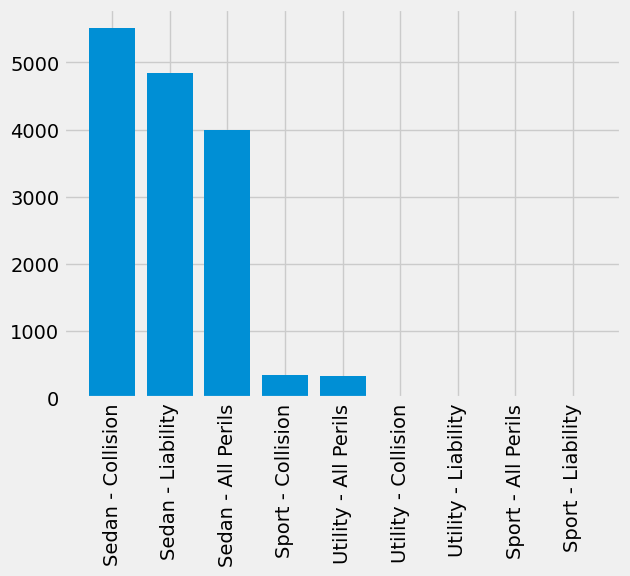

In [ ]:
plt.bar(df['PolicyType'].value_counts().index,df['PolicyType'].value_counts())
plt.xticks(rotation=90)
plt.show()

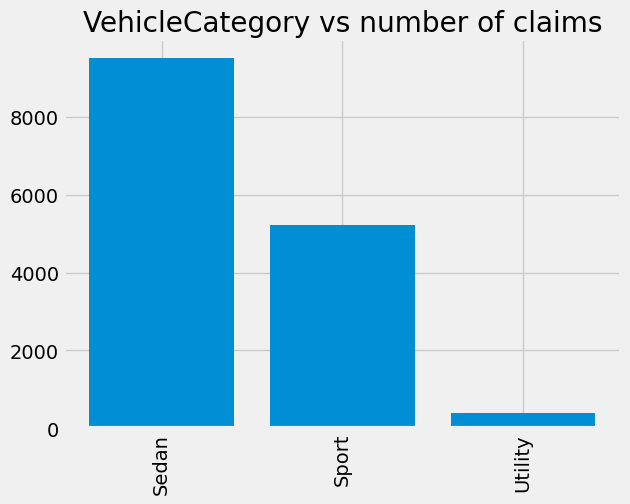

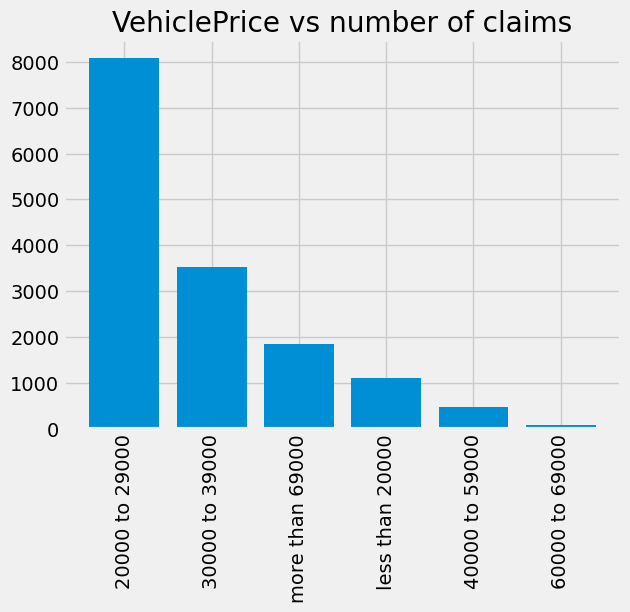

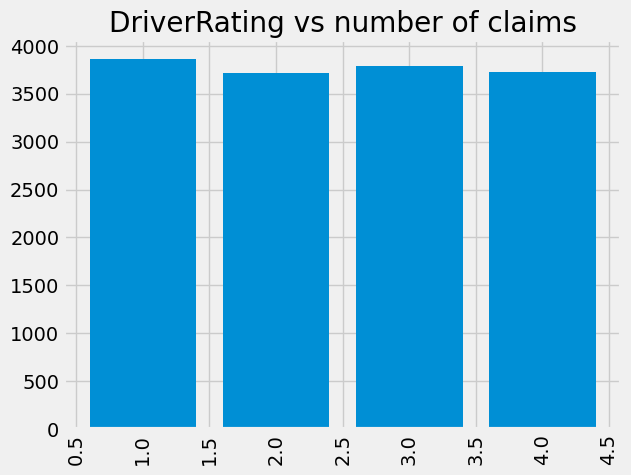

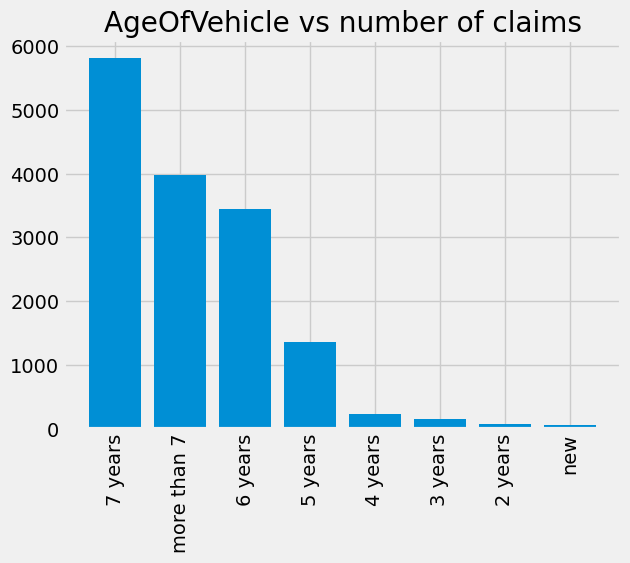

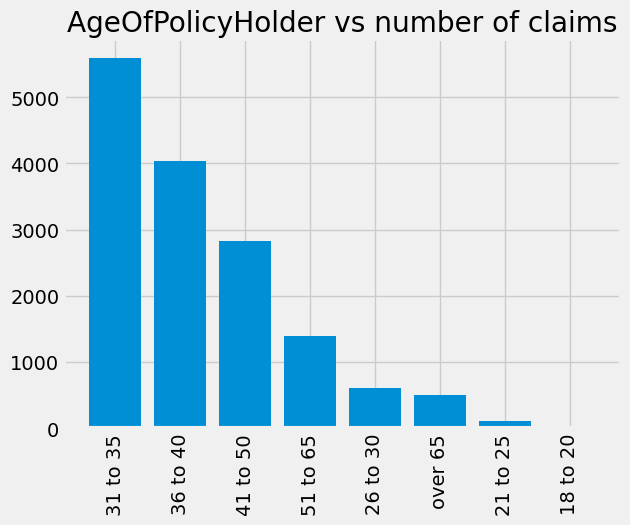

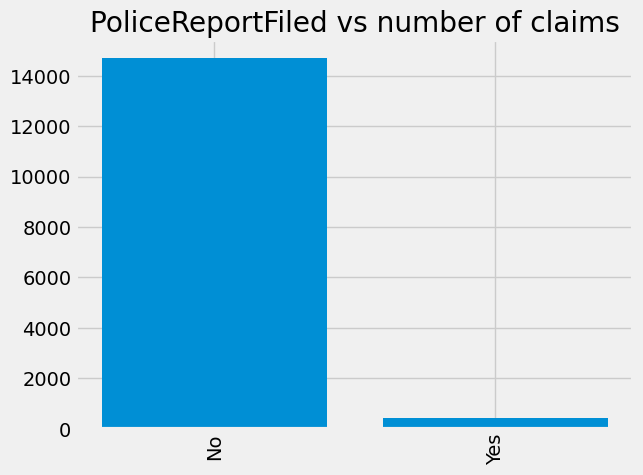

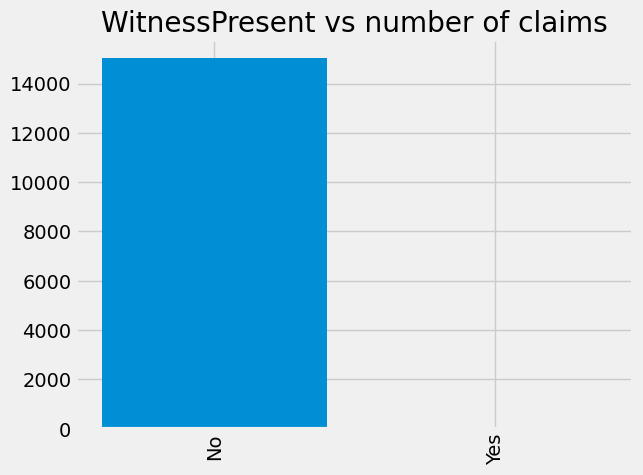

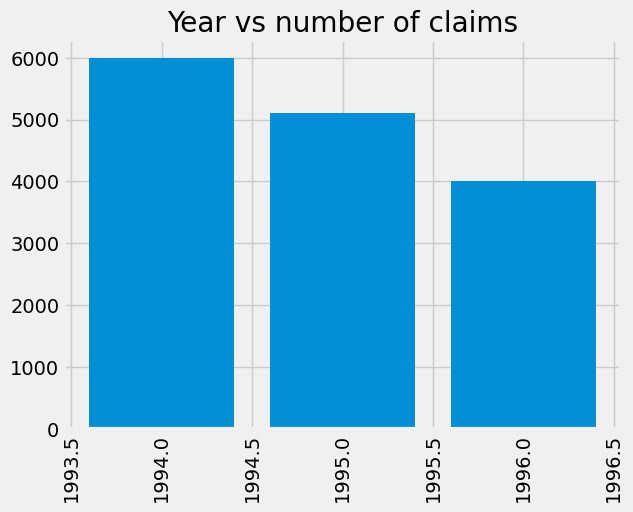

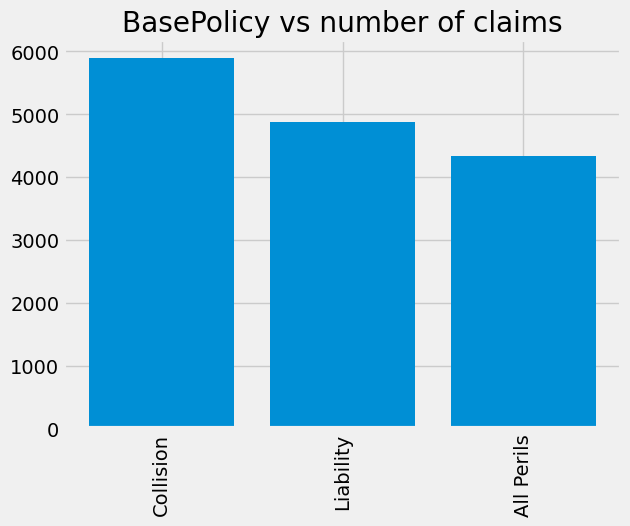

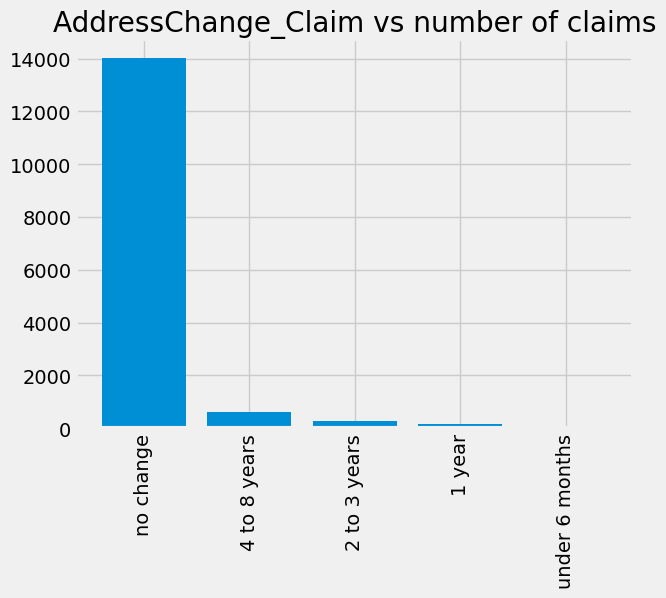

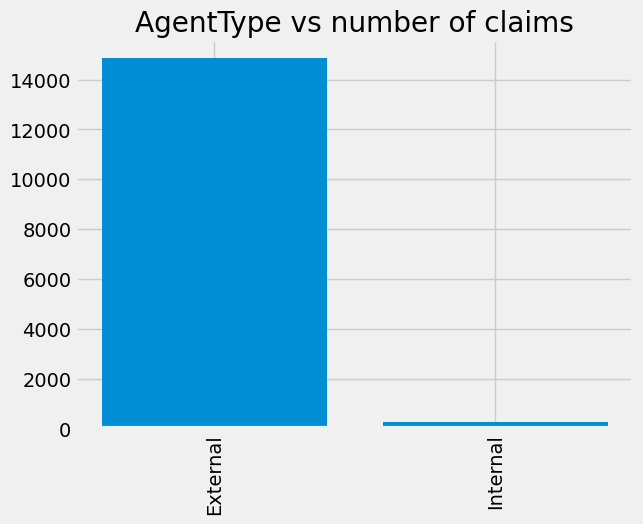

In [ ]:


features = ['VehicleCategory','VehiclePrice','DriverRating','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','Year','BasePolicy','AddressChange_Claim','AgentType']
for i in features:
  plt.bar(df[i].value_counts().index,df[i].value_counts())
  plt.title(f'{i} vs number of claims')
  plt.xticks(rotation=90)
  plt.show()
  print()

In [ ]:
# Analysis Results ->
# 1. Most of the policy holders own Sedan type of vehicle
# 2. Most of the claims are filed by the policy holders which have car price in range 20,000 to 29,000 USD
# 3. There is no dependency of number of accidents on Driver rating
# 4. Genrally older vehicles are more involved in total number of accidents
# 5. In most of the policy claims, No Police case is filed
# 6. In most of the claims there is no witness present
# 7. The number of accidents follow a decreasing trend over the years
# 8. Most of the policy holders have bought policy from External agents
# 9. Most of the claims are filed under the collision category
# 10. People of age group 30 to 35 are much likely to buy the insurance cover

* **Collision insurance**



Covers damage to your car regardless of fault in an accident, such as damage from a collision with another vehicle, object, or rolling over



* **All perils insurance**

An optional coverage option that combines collision or upset and comprehensive coverage. It's considered the broadest form of coverage and protects against all risks unless they are excluded in your policy.



* **Liability car insurance**

Liability car insurance is the part of a car insurance policy that provides financial protection for a driver who harms someone else or their property while operating a vehicle. Car liability insurance only covers injuries or damages to third parties and their property—not to the driver or the driver’s property



In [ ]:
# Clearly most of the policy holders have claimed under the Base Policy 'Collision'

<Axes: xlabel='Age', ylabel='Density'>

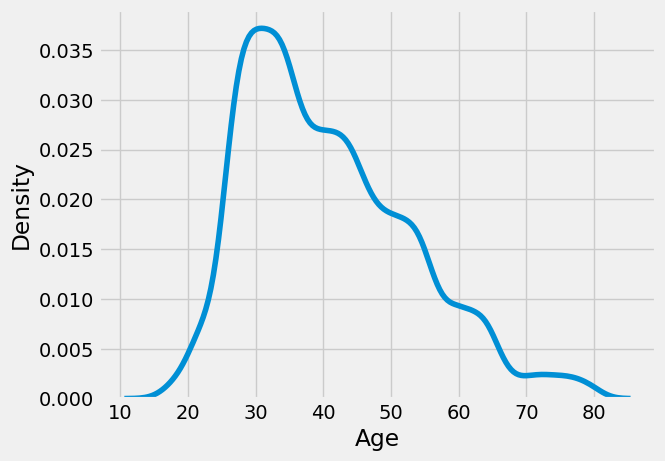

In [ ]:
sns.kdeplot(df['Age'])

In [ ]:
df.Age.skew()

0.7180990195738175

In [ ]:
# As the value of skewness lies between 0.5 and 1 the age column is moderately right skewed

<Axes: ylabel='Age'>

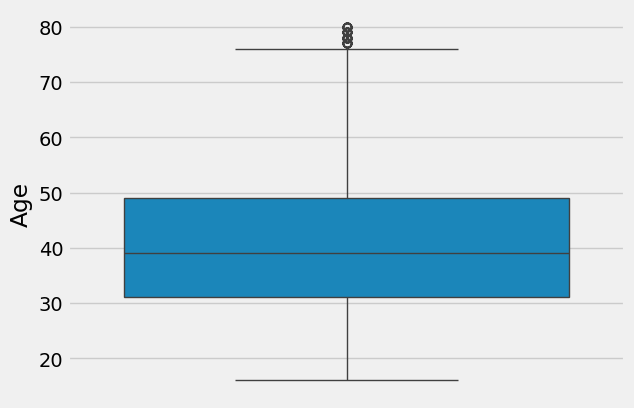

In [ ]:
sns.boxplot(df['Age'])

## Bivariate Analysis and Multivariate analysis

In [ ]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Manufacture_company,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps

In [ ]:
# Questions to be asked according to output column
# 1-> Manufacture_company vs FraudFound_P (Categorical vs categorical)
# 2-> AccidentArea vs FraundFound_P (Categorical vs categorical)
# 3-> Sex, DriverRating vs FraundFound_P (Categorical vs categorical)
# 4-> PolicyType, BasePoilicy vs FraudFound_P (Categorical vs categorical)
# 5-> MaritalStatus, Year vs FraudFound_P (Categorical vs categorical)
# 6-> PoliceReportFiled, WitnessPresent, AgentType vs FraudFound_P (Categorical vs categorical)
# 7-> Age vs FraudFound_P (Numerical vs Categorical)

<Axes: xlabel='FraudFound_P', ylabel='Age'>

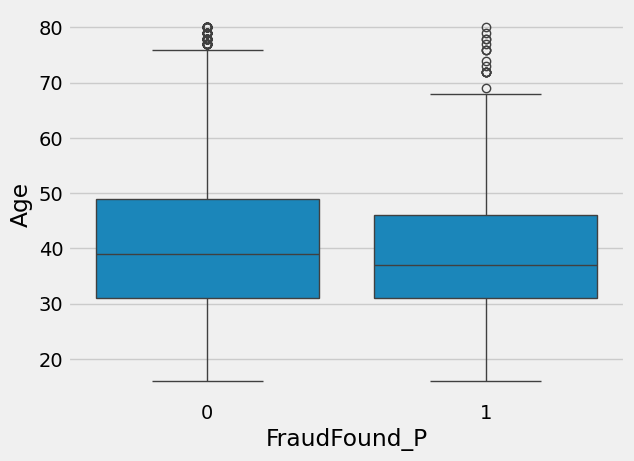

In [ ]:
sns.boxplot(x='FraudFound_P',y='Age',data=df)

The median age of policy holders for fradulent and non fradulent claims are nearly equal

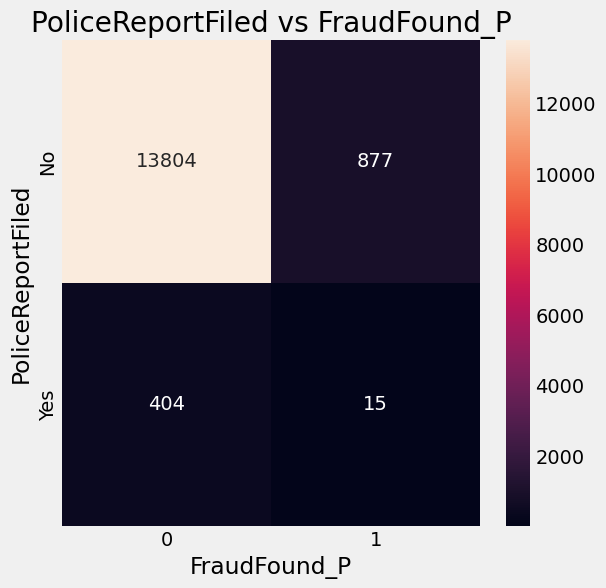

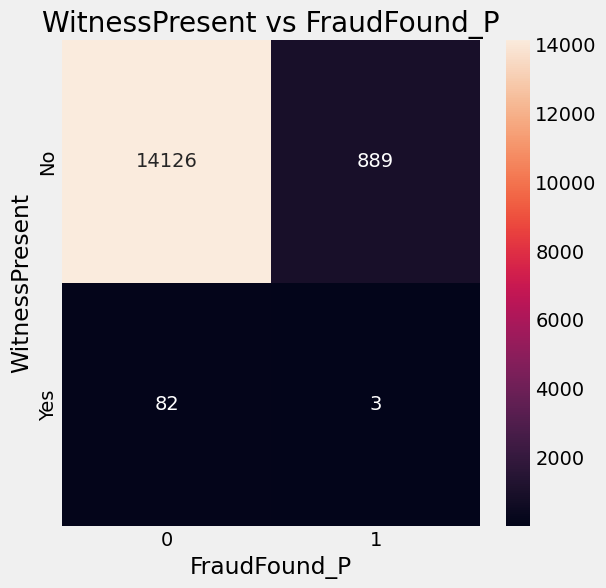

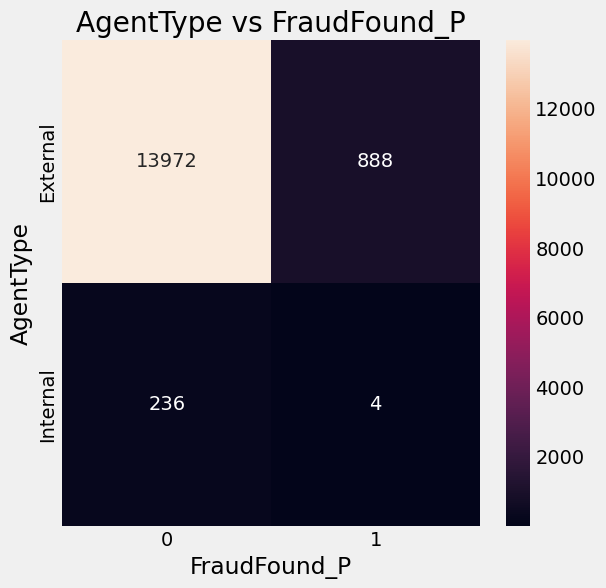

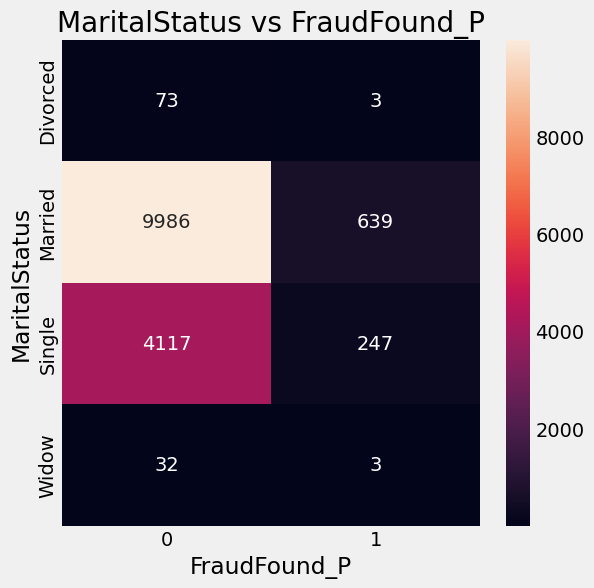

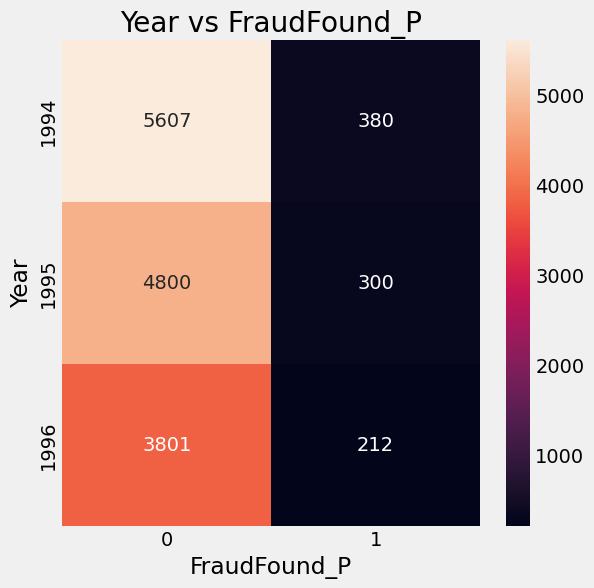

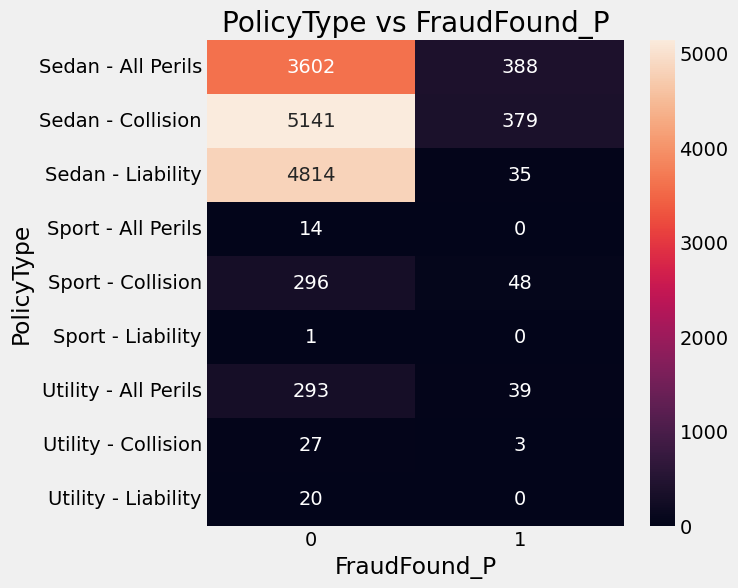

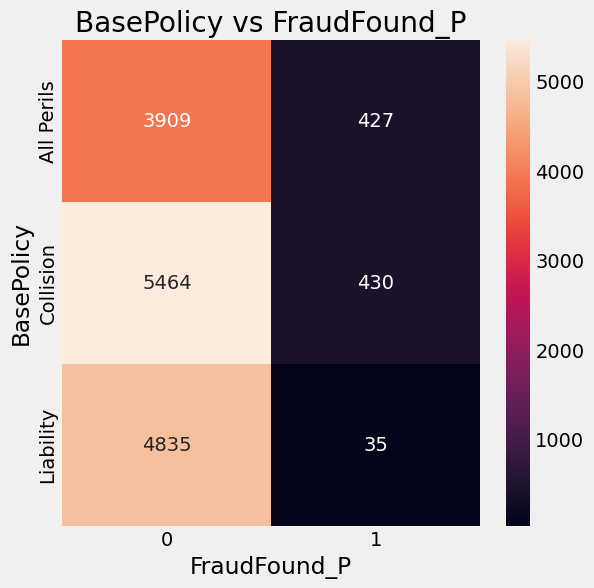

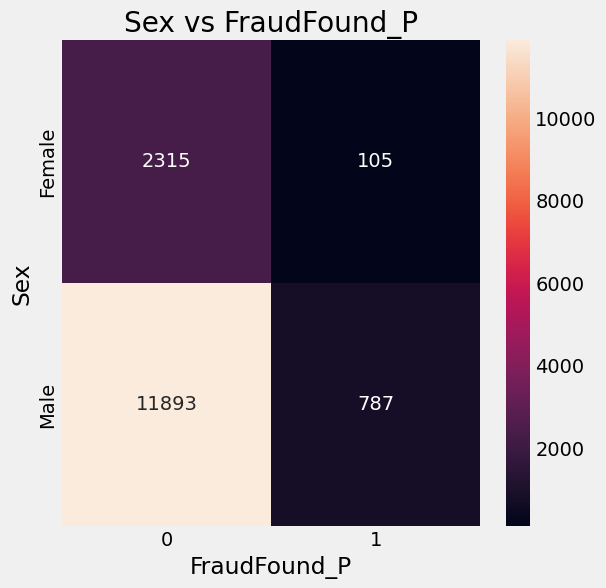

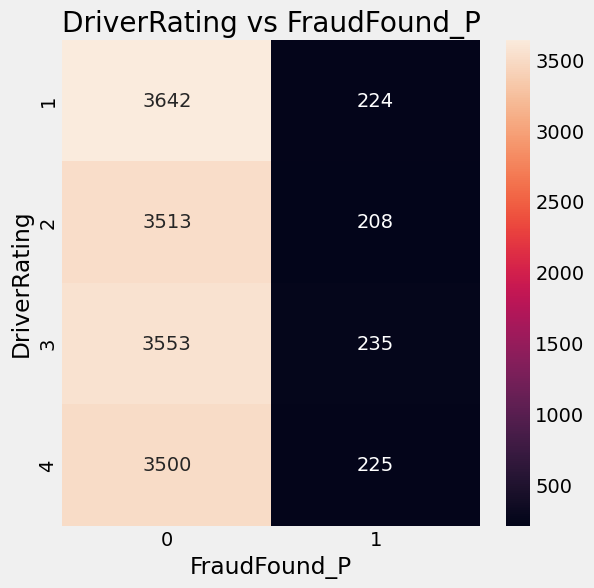

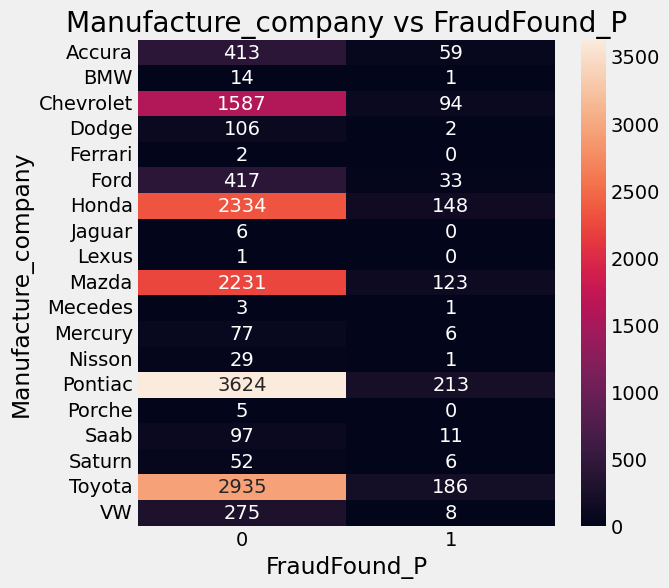

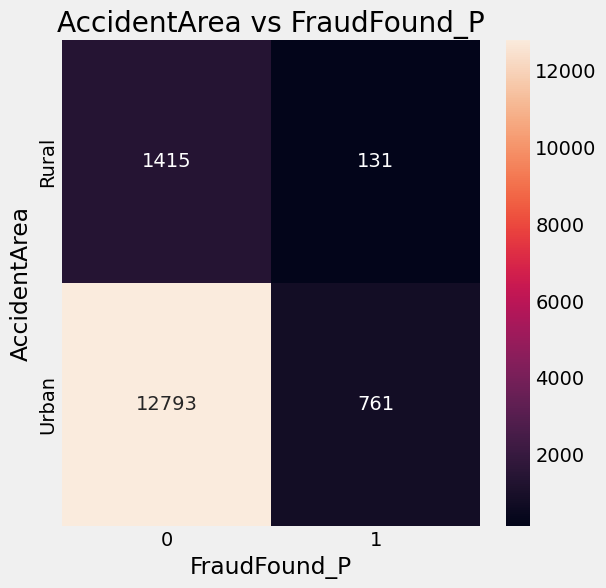

In [ ]:
list = ['PoliceReportFiled', 'WitnessPresent', 'AgentType', 'MaritalStatus', 'Year', 'PolicyType', 'BasePolicy', 'Sex', 'DriverRating', 'Manufacture_company', 'AccidentArea']
for i in list:
  plt.figure(figsize=(6,6))
  sns.heatmap(pd.crosstab(df[f'{i}'],df['FraudFound_P']), annot=True, fmt='d')
  plt.title(f'{i} vs FraudFound_P')
  plt.show()
  print()

## Analysis Results
1. Most of the fraud insurance claims are done when policies are bought through an external agent
2. The number of fraud insurance claims follow a decreasing trend from 1994 to 1996
3. Most of the fraud claims are from base policy All Perils and collision and more accurately (Sedan-All Perils and Sedan-Collision)
4. Most of the Fraud claims are filed by Male Policy Holders
5. Driver rating column can be dropped as it is not varying with FraudFound_P column
6. Most of the fraud claims are from Pontaic, Toyota, Honda, Mazda car owners
7. Most of the fraud claims from accidents in Urban Areas

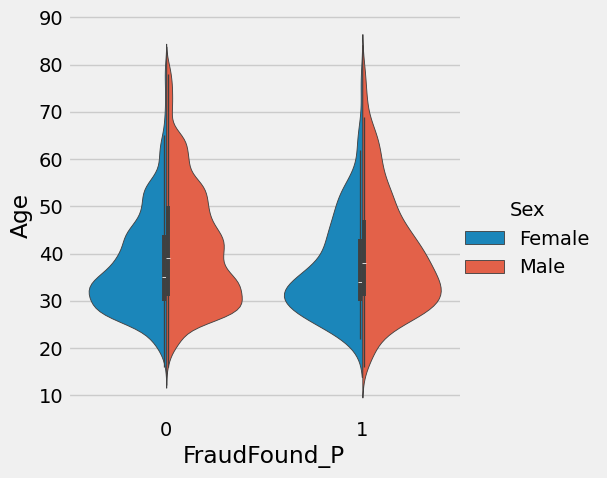

In [ ]:
sns.catplot(data=df,x='FraudFound_P',y='Age',kind='violin',hue='Sex',split=True)

All the distributions of Age column are positively skewed therefore we can apply log/BoxCox/YeoJohnson transformations in order to make it normal if needed

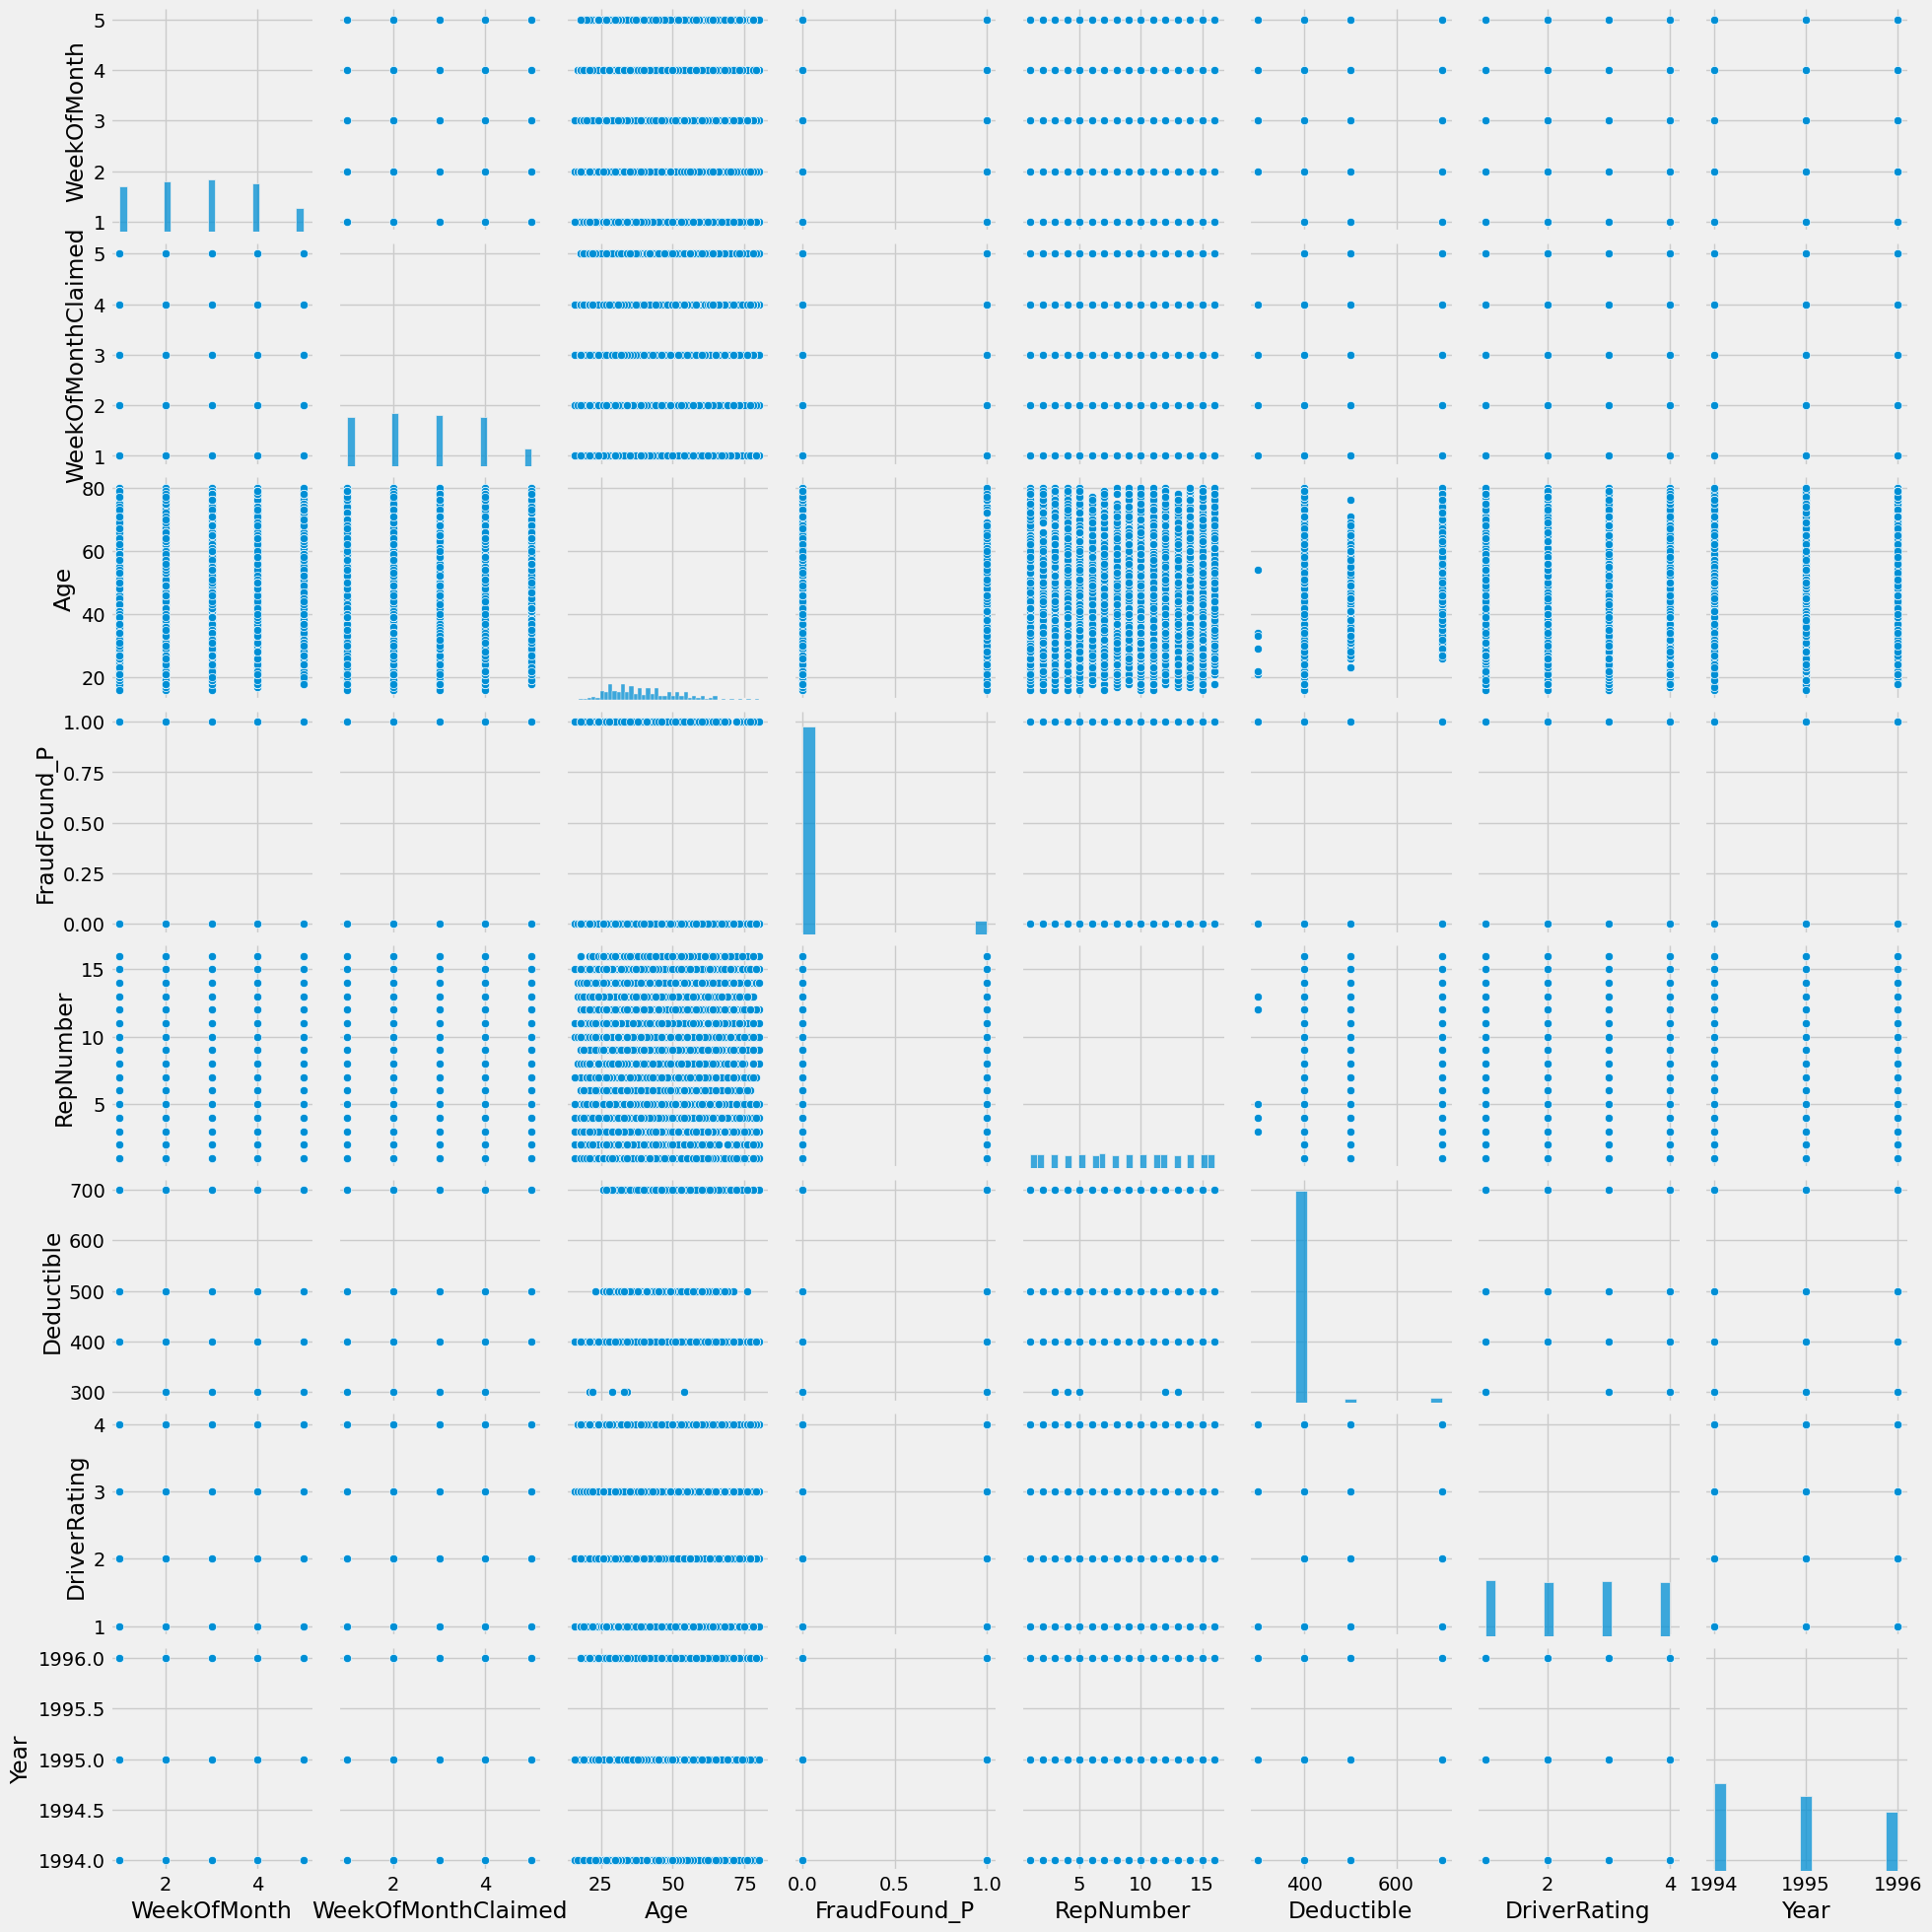

In [ ]:
sns.pairplot(df)

In [ ]:
df

,Month,WeekOfMonth,DayOfWeek,Manufacture_company,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15096,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15097,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15098,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
df.to_csv('fraud_oracle_cleaned.csv', index=False)